In [1]:
import numpy as np
from scipy.spatial.distance import euclidean

# Problem data
node_coords = {
    1: (17, 76), 2: (24, 6), 3: (96, 29), 4: (14, 19), 5: (14, 32), 6: (0, 34), 7: (16, 22), 8: (20, 26),
    9: (22, 28), 10: (17, 23), 11: (98, 30), 12: (30, 8), 13: (23, 27), 14: (19, 23), 15: (34, 7), 16: (31, 7),
    17: (0, 37), 18: (19, 23), 19: (0, 36), 20: (26, 7), 21: (98, 32), 22: (5, 40), 23: (17, 26), 24: (21, 26),
    25: (28, 8), 26: (1, 35), 27: (27, 28), 28: (99, 30), 29: (26, 28), 30: (17, 29), 31: (20, 26)
}
demands = {
    1: 0, 2: 25, 3: 3, 4: 13, 5: 17, 6: 16, 7: 9, 8: 22, 9: 10, 10: 16, 11: 8, 12: 3, 13: 16, 14: 16, 15: 10,
    16: 24, 17: 16, 18: 15, 19: 14, 20: 5, 21: 12, 22: 2, 23: 18, 24: 20, 25: 15, 26: 8, 27: 22, 28: 15, 29: 10,
    30: 13, 31: 19
}
vehicle_capacity = 100
num_vehicles = 5
depot = 1

# Initialize routes
routes = [[] for _ in range(num_vehicles)]
current_loads = [0] * num_vehicles
unvisited_customers = set(node_coords.keys()) - {depot}

# Helper function to calculate Euclidean distance
def calculate_distance(node1, node2):
    return euclidean(node_coords[node1], node_coords[node2])

# Nearest Neighbor Heuristic for initial routes
for vehicle in range(num_vehicles):
    current_node = depot
    while unvisited_customers and current_loads[vehicle] < vehicle_capacity:
        distances = {customer: calculate_distance(current_node, customer) for customer in unvisited_customers}
        nearest_neighbor = min(distances, key=distances.get)
        if current_loads[vehicle] + demands[nearest_neighbor] <= vehicle_capacity:
            routes[vehicle].append(nearest_neighbor)
            current_loads[vehicle] += demands[nearest_neighbor]
            unvisited_customers.remove(nearest_neighbor)
            current_node = nearest_neighbor
        else:
            break

# Display initial routes and loads
for i, route in enumerate(routes):
    print(f"Vehicle {i+1}: Route = {route}, Load = {current_loads[i]}")


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Vehicle 1: Route = [22, 17, 19, 26, 6, 5, 30], Load = 86
Vehicle 2: Route = [9, 13, 24, 8, 31], Load = 87
Vehicle 3: Route = [29, 27, 14, 18, 10, 7], Load = 88
Vehicle 4: Route = [23, 4, 2, 20, 25, 12], Load = 79
Vehicle 5: Route = [16, 15, 3, 11, 28, 21], Load = 72


In [2]:
import os
import numpy as np
from scipy.spatial.distance import euclidean

# Function to load a CVRP dataset from a given path
def load_cvrp_dataset(path):
    node_coords = {}
    demands = {}
    capacity = 0
    with open(path, 'r') as file:
        lines = file.readlines()
        section = None
        for line in lines:
            if line.startswith("DIMENSION"):
                dimension = int(line.split(":")[1])
            elif line.startswith("CAPACITY"):
                capacity = int(line.split(":")[1])
            elif line.startswith("NODE_COORD_SECTION"):
                section = "coords"
            elif line.startswith("DEMAND_SECTION"):
                section = "demands"
            elif line.startswith("DEPOT_SECTION"):
                break  # Assuming depot is always the first node and no need to read further
            elif section == "coords":
                parts = line.split()
                node_coords[int(parts[0])] = (float(parts[1]), float(parts[2]))
            elif section == "demands":
                parts = line.split()
                demands[int(parts[0])] = int(parts[1])
    return node_coords, demands, capacity

# Helper function to calculate Euclidean distance
def calculate_distance(node1, node2, node_coords):
    return euclidean(node_coords[node1], node_coords[node2])

# Function to implement the Nearest Neighbor Heuristic for initializing routes
def nearest_neighbor_init(node_coords, demands, vehicle_capacity, num_vehicles=5):
    depot = 1  # Assuming the depot's node ID is always 1
    routes = [[] for _ in range(num_vehicles)]
    current_loads = [0] * num_vehicles
    unvisited_customers = set(node_coords.keys()) - {depot}

    for vehicle in range(num_vehicles):
        current_node = depot
        while unvisited_customers and current_loads[vehicle] < vehicle_capacity:
            distances = {customer: calculate_distance(current_node, customer, node_coords) for customer in unvisited_customers}
            nearest_neighbor = min(distances, key=distances.get)
            if current_loads[vehicle] + demands[nearest_neighbor] <= vehicle_capacity:
                routes[vehicle].append(nearest_neighbor)
                current_loads[vehicle] += demands[nearest_neighbor]
                unvisited_customers.remove(nearest_neighbor)
                current_node = nearest_neighbor
            else:
                break

    return routes, current_loads

# Directory containing the dataset files
dataset_directory = '/Users/rishithareddyavuku/Downloads/VehicleRoutingProblem-master/benchmarks/B'

# List all dataset files in the directory
dataset_files = [os.path.join(dataset_directory, f) for f in os.listdir(dataset_directory) if os.path.isfile(os.path.join(dataset_directory, f))]

# Process each dataset
for dataset_path in dataset_files:
    print(f"Processing {dataset_path}")
    node_coords, demands, vehicle_capacity = load_cvrp_dataset(dataset_path)
    routes, loads = nearest_neighbor_init(node_coords, demands, vehicle_capacity)
    # Output the results
    for i, route in enumerate(routes):
        print(f"Vehicle {i+1}: Route = {route}, Load = {loads[i]}")
    print("\n")


Processing /Users/rishithareddyavuku/Downloads/VehicleRoutingProblem-master/benchmarks/B/B-n34-k5.vrp
Vehicle 1: Route = [6, 7, 26, 18, 32, 16, 29, 14, 20], Load = 100
Vehicle 2: Route = [12, 31, 3, 8, 22, 5, 21], Load = 91
Vehicle 3: Route = [2, 19, 17, 10], Load = 95
Vehicle 4: Route = [13, 27, 9, 34], Load = 91
Vehicle 5: Route = [28, 30, 4, 25, 15, 11, 24, 33, 23], Load = 80


Processing /Users/rishithareddyavuku/Downloads/VehicleRoutingProblem-master/benchmarks/B/B-n45-k5.vrp
Vehicle 1: Route = [40, 31, 24, 18, 11, 37, 2], Load = 81
Vehicle 2: Route = [6, 42, 44, 23, 7, 13, 9, 22, 5, 17], Load = 96
Vehicle 3: Route = [29, 43, 41, 30, 12, 26, 27, 20, 34, 21, 36, 39], Load = 100
Vehicle 4: Route = [10, 14, 16, 33, 38], Load = 84
Vehicle 5: Route = [19, 45, 15, 28, 35, 8, 3, 25], Load = 99


Processing /Users/rishithareddyavuku/Downloads/VehicleRoutingProblem-master/benchmarks/B/B-n64-k9.vrp
Vehicle 1: Route = [8, 31, 47, 42, 55, 9, 22, 28, 39], Load = 93
Vehicle 2: Route = [18, 32, 

In [6]:
def calculate_total_distance(route, node_coords):
    total_distance = 0.0
    if not route:
        return total_distance
    # Add distance from depot to the first customer
    depot_position = node_coords[1]  # Assuming the depot's ID is always 1
    first_customer_position = node_coords[route[0]]
    total_distance += euclidean(depot_position, first_customer_position)
    # Sum distances between consecutive customers
    for i in range(len(route) - 1):
        distance = euclidean(node_coords[route[i]], node_coords[route[i + 1]])
        total_distance += distance
    # Add distance from the last customer back to the depot
    last_customer_position = node_coords[route[-1]]
    total_distance += euclidean(last_customer_position, depot_position)
    return total_distance


In [7]:
from math import sqrt

def euclidean(point1, point2):
    return sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))


In [8]:
import pandas as pd

# Assuming you have a function to calculate total route distance
# def calculate_total_distance(route, node_coords): ...

lowest_distances = []

for dataset_path in dataset_files:
    node_coords, demands, vehicle_capacity = load_cvrp_dataset(dataset_path)
    routes, loads = nearest_neighbor_init(node_coords, demands, vehicle_capacity)
    
    # Calculate and find the lowest distance among routes
    lowest_distance = float('inf')
    for route in routes:
        total_distance = calculate_total_distance(route, node_coords)  # You need to implement this
        if total_distance < lowest_distance:
            lowest_distance = total_distance
    
    lowest_distances.append({
        "Dataset": os.path.basename(dataset_path),
        "Lowest Route Distance": lowest_distance
    })

# Convert the results into a DataFrame for nicer display
results_df = pd.DataFrame(lowest_distances)

# Display the table
print(results_df)


          Dataset  Lowest Route Distance
0    B-n34-k5.vrp             144.242091
1    B-n45-k5.vrp              56.524256
2    B-n64-k9.vrp              56.615493
3    B-n68-k9.vrp              63.110265
4    B-n38-k6.vrp              77.335116
5    B-n45-k6.vrp              55.369275
6    B-n57-k7.vrp             140.087222
7   B-n67-k10.vrp              42.399983
8    B-n66-k9.vrp              54.411707
9    B-n50-k8.vrp             101.430416
10   B-n51-k7.vrp             103.395813
11   B-n43-k6.vrp              83.540966
12   B-n41-k6.vrp              88.783841
13   B-n44-k7.vrp              62.638007
14   B-n56-k7.vrp              38.693429
15   B-n35-k5.vrp             122.989940
16  B-n78-k10.vrp              29.722524
17   B-n39-k5.vrp              63.636518
18   B-n50-k7.vrp              67.762417
19   B-n52-k7.vrp              55.095749
20  B-n63-k10.vrp              37.839499
21   B-n57-k9.vrp             124.886040
22   B-n31-k5.vrp             102.999915


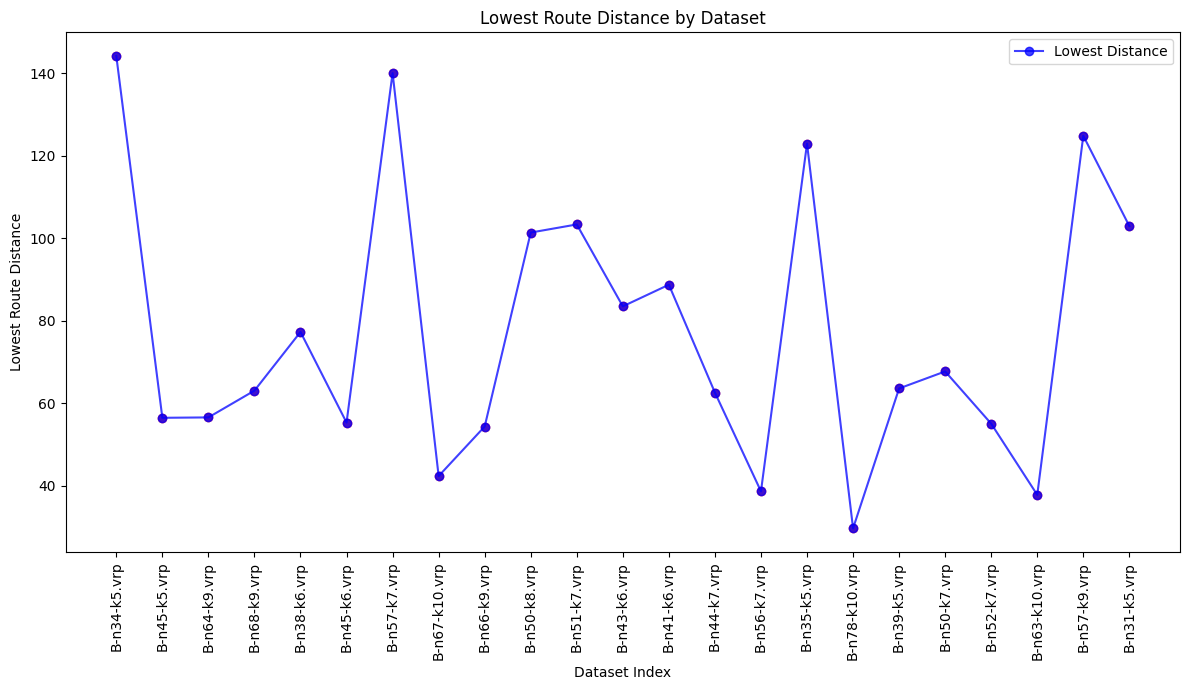

In [15]:
import matplotlib.pyplot as plt

# Convert dataset names to a numerical index for plotting
dataset_indices = range(len(results_df))

# Use the 'Lowest Route Distance' column as the y-axis values
lowest_distances = results_df['Lowest Route Distance']

# Creating the scatter plot with connected lines
plt.figure(figsize=(12, 7))
plt.plot(dataset_indices, lowest_distances, '-o', color='blue', label='Lowest Distance', alpha=0.75)  # '-o' creates lines with circle markers
plt.scatter(dataset_indices, lowest_distances, color='red', alpha=0.75)  # Scatter plot on top for emphasis

plt.title('Lowest Route Distance by Dataset')
plt.xlabel('Dataset Index')
plt.ylabel('Lowest Route Distance')
plt.xticks(dataset_indices, results_df['Dataset'], rotation='vertical')
plt.legend()
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()
